<a href="https://colab.research.google.com/github/surayajohari/STQD6324-Data-Management/blob/main/suraya_assignment1_STQD6324.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NAME**: SURAYA ADNIN BINTI JOHARI

**NO. MATRIKS**: P137383

**SUBJECT CODE**: STQD6324

**SUBJECT NAME**: DATA MANAGEMENT

**ASSIGNMENT 1**: Understanding Customer Churn Behavior in the Banking Sector: Patterns, Predictors, and Strategies for Retention

# **CHAPTER 1 - INTRODUCTION**

In today's era dynamic and competitive banking landscape, not only money or exchange rate is important in banking industry but customers are high likely important as well especially in a competitive banking industry. Nowadays, understanding and effectively managing customer churn behavior has emerged as a critical concern for financial institutions.

Customer churn is a term used where customers discontinue their relationship with a bank or closed their account with a bank. Beyond its immediate financial repercussions, such as revenue loss and diminished profitability, customer churn poses a significant challenge to the enduring sustainability and growth trajectory of banking businesses. The departure of customers not only disrupts existing revenue streams but also impedes future revenue generation opportunities, thereby undermining the bank's long-term viability and thwarting its aspirations for sustained growth and competitiveness.

Thus, effectively managing and mitigating customer churn emerges as a critical imperative for banks striving to maintain their market position and achieve enduring success in today's competitive banking landscape. There is a growing imperative for banks to delve deeper into the patterns, predictors, and underlying dynamics of customer churn behavior.



# **CHAPTER 2 - PROBLEM STATEMENT**

This research aims to address this gap by undertaking a comprehensive investigation into customer churn behavior within the banking sector. Specifically, the study seeks to analyze the customer churn rate within banks to discern the underlying reasons for customer attrition.

There are a few terms used in this research paper. The terms are as per follow:
1. **Churn** refers to customers leaving a bank or discontinuing their banking services.
2. **Banking Churn Analysis** is a process of studying customer behavior in the banking industry to predict and understand customer attrition or churn.
3. **Banking Churn Modeling** aims to identify patterns and factors that contribute to customer churn, enabling banks to take proactive measures to retain customers and improve customer satisfaction.




# **CHAPTER 3 - METHODOLOGY**

This research will commence by obtaining comprehensive datasets based on banking industry. Data cleaning such as identifying and removing null data and removing duplicating data will be conducted before exploration of the dataset.

Initial exploration of the dataset will be conducted through exploratory data analysis (EDA) techniques. Data visualization such as bar chart, distribution of data and box plot will be employed to gain insights into the distribution of variables, identify patterns and detect and data anomalies or outliers.

Feature engineering will be undertaken to preprocess the dataset and extract meaningful features relevant to customer churn behavior. This process may involve the creation of new variables, handling missing values, encoding categorical variables, and standardizing numerical features.

# **CHAPTER 4 - RESULTS AND FINDINGS**

## 4.0 Importing Required Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
sns.set(style="darkgrid",font_scale=1.5)

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score ,f1_score
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

from imblearn.over_sampling import SMOTE

##4.1 Basic Understanding of Dataset

In this section, we will be doing data cleaning and data understanding. Firstly, we will load the data.

In [ ]:
bankData = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Churn_Modelling.csv", index_col=False)
bankData.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# Removing RowNumber as it does not contributes to the analysis
del bankData['RowNumber']
bankData.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
rowCount = len(bankData)
print("Total number of rows present in the data set is", rowCount, "\n")

columnCount = len(bankData.columns)
print("Total number of columns present in the data set is", columnCount)

Total number of rows present in the data set is 10000 

Total number of columns present in the data set is 13


The results reveals that the dataset comprises 10,000 rows, denoting the presence of 10,000 samples. Additionally, the dataset encompasses 14 columns, signifying the inclusion of 13 variables within the dataset.

In [ ]:
bankData.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

The above coding shows the list name of each columns in the data set. This also shows the variable name within the dataset.
1. CustomerId - It can be used to track and differentiate individual customers within the dataset.
2. Surname -  It provides information about the family name of each customer.
3.CreditScore: It is a numerical value that assesses the creditworthiness of an individual based on their credit history and financial behavior.
4. Geography: It provides information about the customers' geographic distribution, allowing for analysis based on regional or national factors.
5. Gender: It categorizes customers as either male or female, enabling gender-based analysis if relevant to the churn prediction.
6. Age: It represents the customer's age in years and can be used to analyze age-related patterns and behaviors.
7. Tenure: It typically represents the number of years or months the customer has been associated with the bank.
8. Balance: It reflects the amount of money in the customer's bank account at a specific point in time.
9. NumOfProducts: It can include various offerings such as savings accounts, loans, credit cards, etc.
10. HasCrCard: It is a binary variable with a value of 1 if the customer possesses a credit card and 0 otherwise.
11. IsActiveMember: It is a binary variable indicating whether the customer is an active member (1) or not (0) within the bank.
12. EstimatedSalary: It provides an approximation of the customer's income level, which can be relevant for analyzing churn behavior.
13. Exited: It indicates whether a customer has churned (1) or not (0) from the bank. It is the variable we aim to predict using the other features.



In [ ]:
# To check if there is any missing values in the data set

missing_values =  bankData.isna().sum()

missing_values_df = pd.DataFrame({'Column Name': missing_values.index, 'Total of Missing Values': missing_values.values})

print("Table of total number of missing values in each column:")
print(missing_values_df)

Table of total number of missing values in each column:
        Column Name  Total of Missing Values
0        CustomerId                        0
1           Surname                        0
2       CreditScore                        0
3         Geography                        0
4            Gender                        0
5               Age                        0
6            Tenure                        0
7           Balance                        0
8     NumOfProducts                        0
9         HasCrCard                        0
10   IsActiveMember                        0
11  EstimatedSalary                        0
12           Exited                        0


None of the columns is having missing values. Thus, we don't have to perform Data Imputation.

In [ ]:
# To check if there is any duplicate records in the dataset.

duplicate_rows = bankData.duplicated()

# Check if there are any duplicate rows
if duplicate_rows.any():
    print("There are duplicate records in the dataset.")
else:
    print("There are no duplicate records in the dataset.")

There are no duplicate records in the dataset.


There is no duplicate records in this dataset which shows that there is no data lekage.

In [ ]:
# Renaming Exited column name & turned it into Yes/No

# Renaming column name
bankData.rename(columns={'Exited': 'Churned'}, inplace = True)

# Replacing the value to be Yes/No
bankData['Churned'].replace({0:"No",1:"Yes"},inplace=True)

bankData.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,Yes
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,No
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,Yes
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,No
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,No


##4.2 Explorator Data Analysis

### 4.2.1 Visualizing Dataset

#### 4.2.1.1 Visualizing Churned Customer

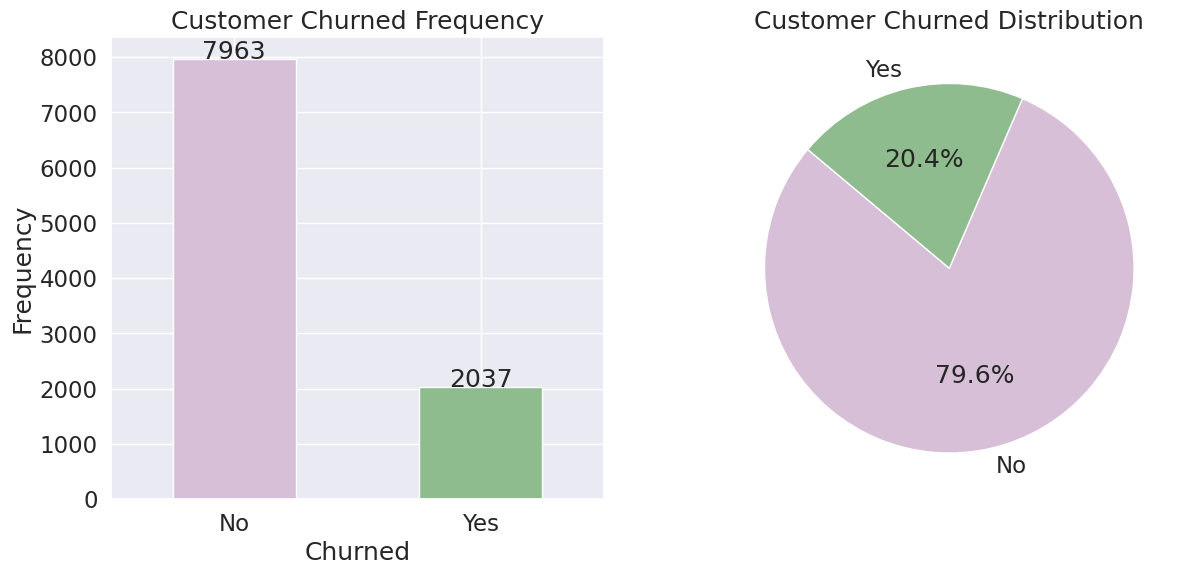

In [ ]:
#To plot Bar Chart and Pie Chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

churnedCounts = bankData['Churned'].value_counts()
chartColor = ['thistle','darkseagreen']

# Bar Chart
barChart = churnedCounts.plot(kind='bar', color=chartColor, ax=ax1)
barChart.set_title('Churned Customer Frequency')
barChart.set_xlabel('Churned')
barChart.set_ylabel('Frequency')
barChart.set_xticklabels(barChart.get_xticklabels(), rotation=0)

# Add data labels to the bar chart
for i, v in enumerate(value_counts):
    ax1.text(i, v + 0.1, str(v), ha='center')

# Pie Chart
pie = churnedCounts.plot(kind='pie', colors=chartColor, autopct='%1.1f%%', startangle=140, ax=ax2)
pie.set_title('Churned Customer Distribution')
pie.set_ylabel('')

plt.show()


There is huge class-imbalance which can lead to bias in model performance.
So to overcome this class-imbalance we have to use over-sampling technique from SMOTE.

In [ ]:
# To have a function for plotting Customer Churned
def columnPlot(column):
    plt.figure(figsize=(17,6))
    chartColor = ['#8FBC8F', "#D8BFD8"]
    plot = sns.countplot(x=column, data=bankData, hue="Churned",palette=chartColor)
    for value in plot.patches:
        percentage = "{:.1f}%".format(100*value.get_height()/len(bankData[column]))
        x = value.get_x() + value.get_width() / 2 - 0.05
        y = value.get_y() + value.get_height()
        plot.annotate(percentage, (x,y), fontweight="black",size=15)

    plt.title(f"Churned Customer by {column}",fontweight="black",size=20,pad=20)
    plt.show()

In [ ]:
# To have a function for plotting normal histplot and boxplot

def continousPlot(column):
    plt.figure(figsize=(17,6))
    plt.subplot(1,2,1)
    chartColor = ['#8FBC8F', "#D8BFD8"]
    sns.histplot(x=column,hue="Churned",data=bankData,kde=True,palette=chartColor)
    plt.title(f"Distribution of {column} by Churn Status",fontweight="black",pad=20,size=15)

    plt.subplot(1,2,2)
    sns.boxplot(x="Churned", y=column, data=bankData, palette=chartColor)
    plt.title(f"Boxplot of {column} by Churn Status",fontweight="black",pad=20,size=15)
    plt.tight_layout()
    plt.show()

#### 4.2.1.2 Visualizing Customer Churned by Gender

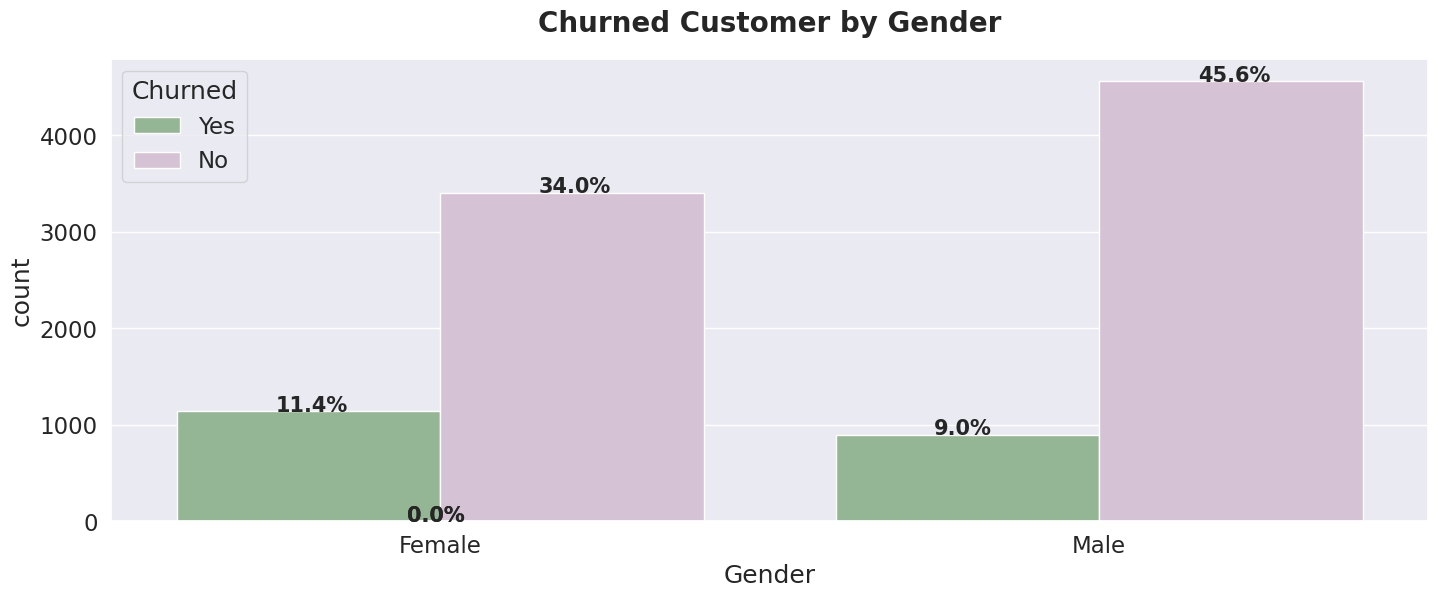

In [ ]:
columnPlot('Gender')

Based on the graph depicted above, we observe that the proportion of churned customers differs between genders. Specifically, among female customers, approximately 11.4% are identified as churned customers, whereas among male customers, this proportion is slightly lower at approximately 9.0%. This suggests a gender disparity in churn rates within the studied population

#### 4.2.1.3 Visualizing Customer Churned by Geography

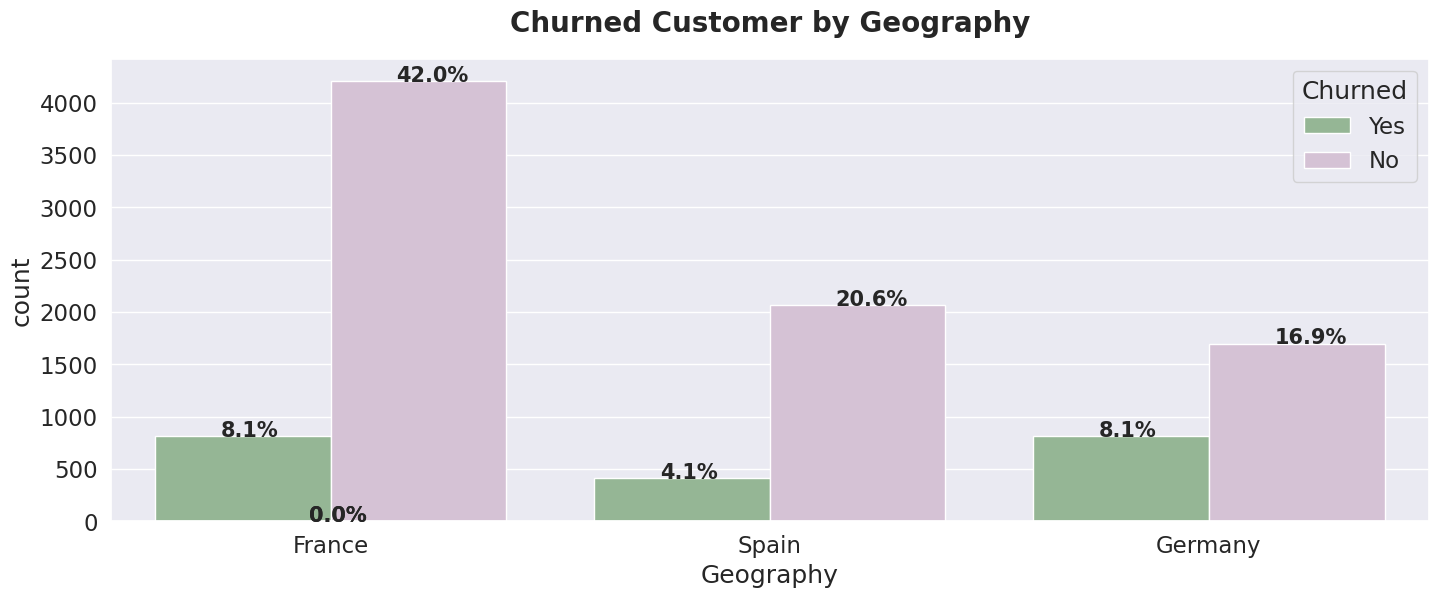

In [ ]:
columnPlot('Geography')

The dataset comprises customers from France, Spain, and Germany, with population distributions of 50.1%, 24.7%, and 25.0%, respectively. This also indicate that half of the customers are coming from France.

The graph above reveals notable variations in churn rates across different geographical regions. Specifically, when examining customer churn within France, we observe that approximately 8.1% of customers have churned, while a substantial majority, constituting 42.0%, remain retained. In Spain, the churn rate is notably lower, with only 4.1% of customers identified as churned, leaving the majority, at 20.6%, retained. Meanwhile, in Germany, churn rates are similar to those in France, with approximately 8.1% of customers identified as churned and 16.9% retained.

Considering the significant contrast between churned and retained customers in France, where the population of retained customers five times higher than churned customers, the bank can conduct an analysis of the banking facilities and customer behavior in France. It can then endeavor to implement similar strategies for customers in Germany, where the proportion of churned customers is only half that of retained customers. By leveraging insights from France, the bank can potentially reduce churn rates and enhance customer retention in Germany, thereby optimizing its overall customer base.

#### 4.2.1.4 Visualizing Customer Churned by Has Credit Card

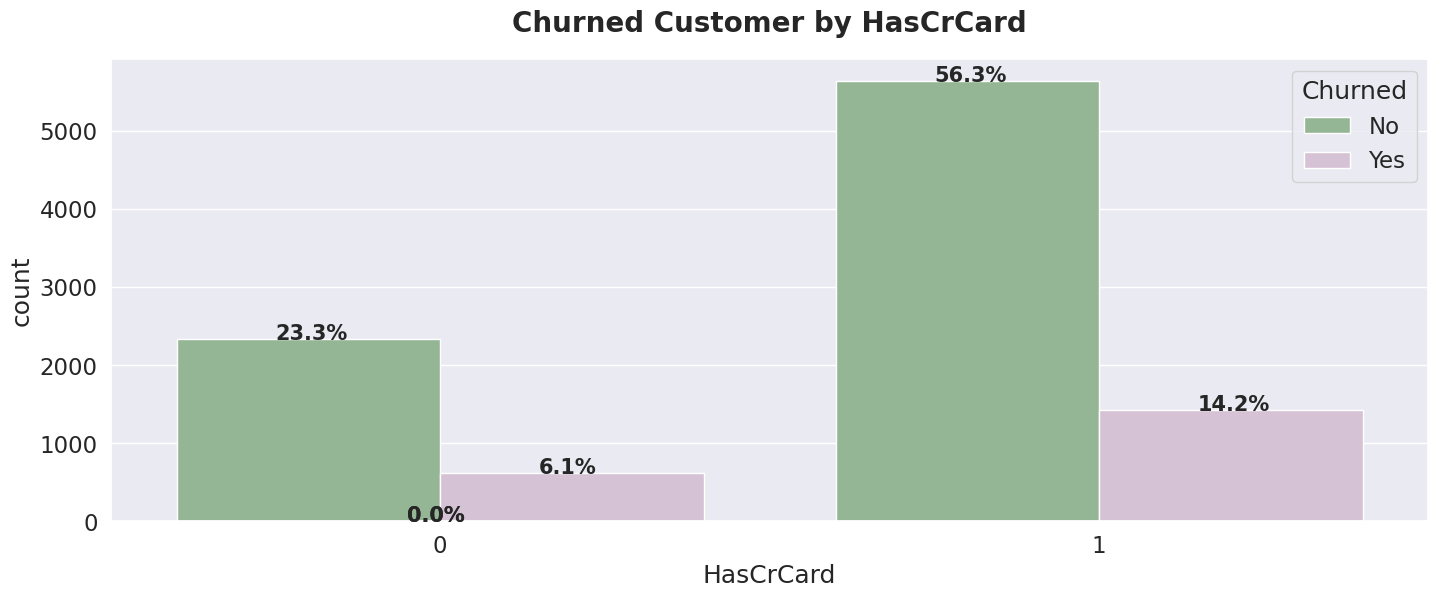

In [ ]:
columnPlot("HasCrCard")

Based on the graph of Customer Churned by HasCrCard, we can see that more than 70% of customers are having credit card. Additionally, the churn probability value for the both of the categories is almost 1:4. Therefore, credit card is not a variable that affects the churn of customers.

#### 4.2.1.5 Visualizing Customer Churned by Number of Banking Products Owned

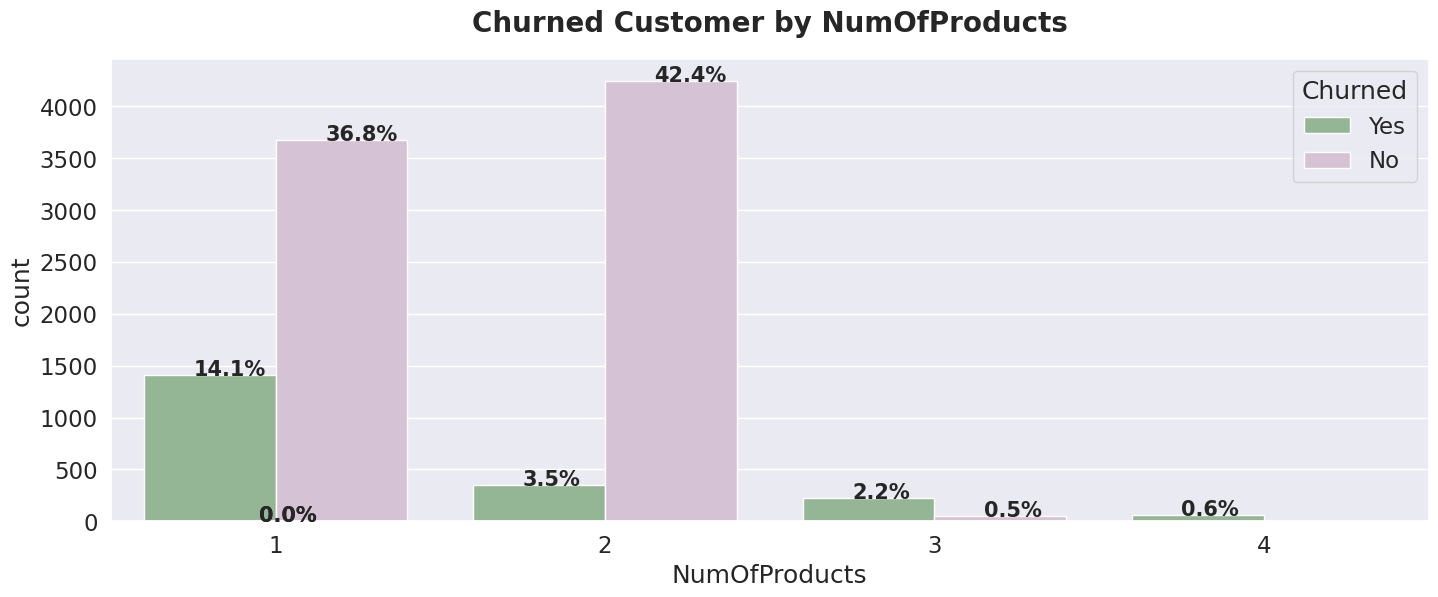

In [ ]:
columnPlot("NumOfProducts")

The graph above illustrates that the vast majority, comprising 96.8% of customers, possess either one or two banking products. Conversely, only a small percentage, less than 5%, of customers hold more than two total banking products.

Interestingly, the lowest churn rate is observed among customers with precisely two products, standing at 3.5%. Conversely, the highest churn rate is observed among customers with either only one product or more than two products. However, it's important to note that this analysis reveals a class imbalance, potentially leading to bias in the model and misrepresentation of the minority class.

To address this imbalance, we propose a feature engineering approach by grouping customers with more than two products together, thereby reducing class disparity.

Nevertheless, based on the findings of this analysis, the bank could consider encouraging customers to maintain at least two banking products. This could be achieved through offering rewards and incentives to customers who possess a minimum of two banking products, thereby potentially fostering greater customer retention and engagement.

#### 4.2.1.6 Visualizing Customer Churned by Status of Active Member

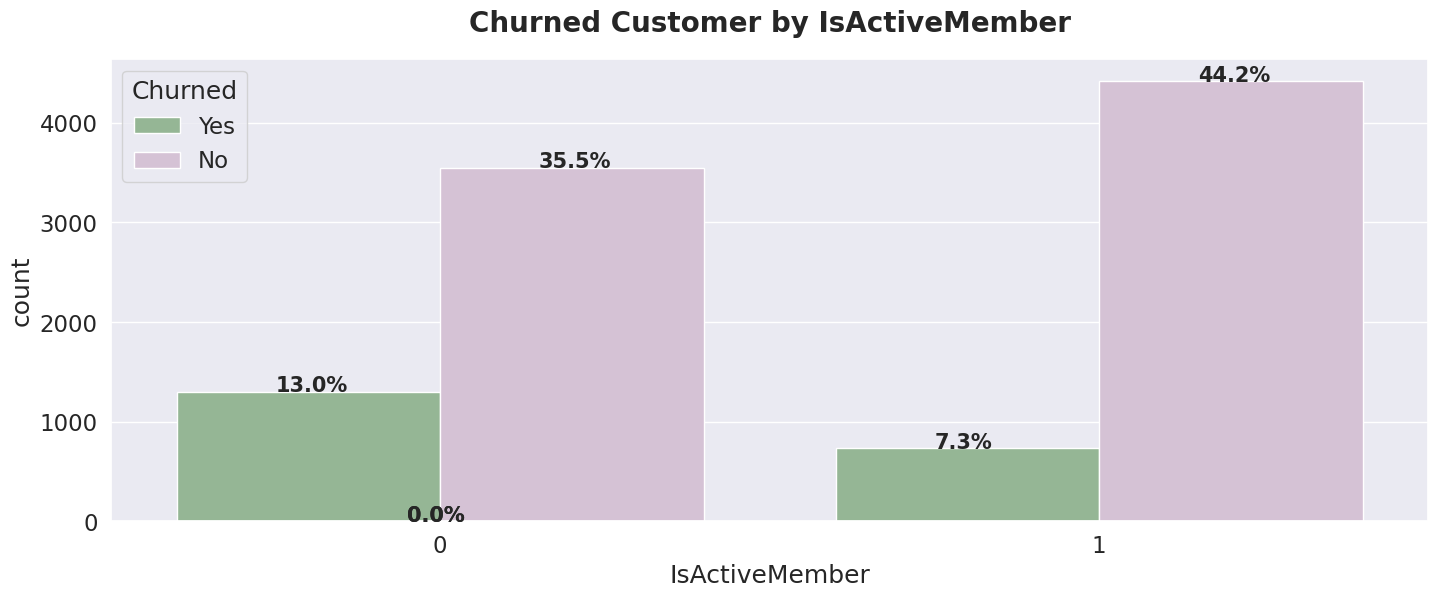

In [ ]:
columnPlot("IsActiveMember")

The graph illustrates that the number of active and non-active customers is approximately equal. Additionally, we observed that the churn rate among non-active members is twice as high as the churn rate among active members. This suggests that customers who are not active members are more prone to deactivating their bank accounts compared to those who are active members.

In order to address the disparity in churn rates between active and non-active members, we recommend that the bank implements strategies such as regular communications and updates, as well as enhanced digital services through the bank app or web. These measures can help ensure that customers remain engaged with the banking facilities, potentially leading to improved retention rates among both active and non-active members.







#### 4.2.1.7 Visualizing Customer Churned by Tenure

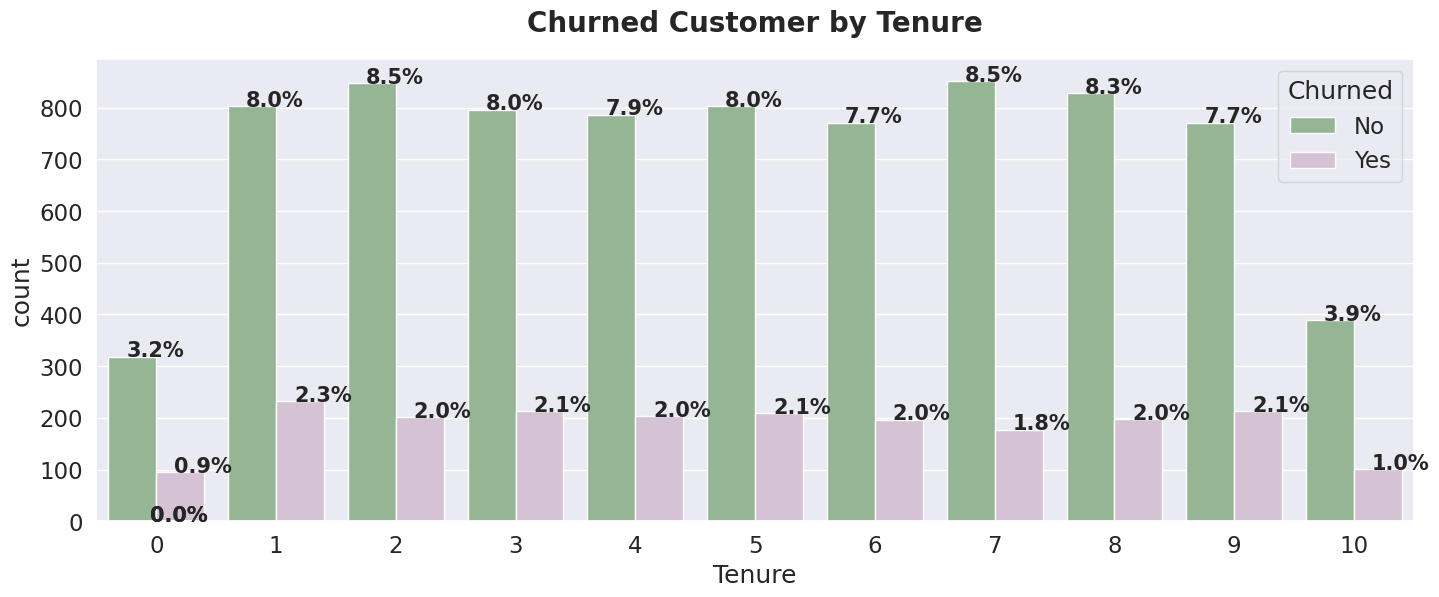

In [ ]:
columnPlot("Tenure")

With the highest tenure among customers spanning 10 years, indicating that these individuals commenced their account relationships a decade ago, it's pertinent to examine the churn status distribution across varying tenure lengths. Despite the notable tenure duration, the distribution of churn statuses, whether active or inactive, exhibits a remarkable level of similarity. This uniformity in churn behavior across different tenure groups suggests a lack of discernible patterns or trends that could be attributed solely to the length of account tenure. Consequently, while the tenure duration provides insight into the long-standing relationship between customers and the bank, its impact on churn behavior appears to be minimal or inconclusive.

#### 4.2.1.8 Visualizing Customer Churned by Credit Score

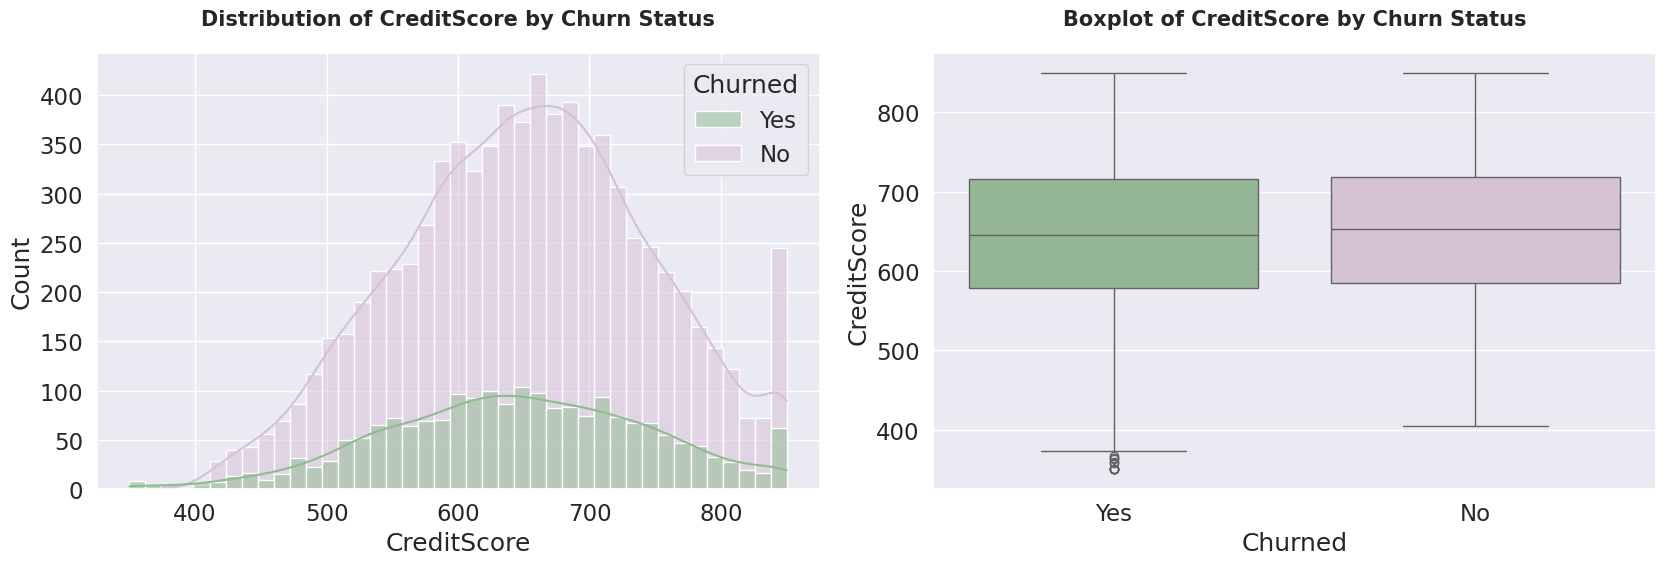

In [ ]:
continousPlot("CreditScore")

The median credit score remains nearly identical for both churned and non-churned customers. This indicate that, on average, customers who churn and those who do not churn possess comparable credit scores. However, given the negligible discrepancy in values between these two customer segmentations for credit score, it becomes challenging to extract actionable insights or discern any discernible patterns or trends that may influence customer churn behaviour.

#### 4.2.1.8 Visualizing Customer Churned by Age

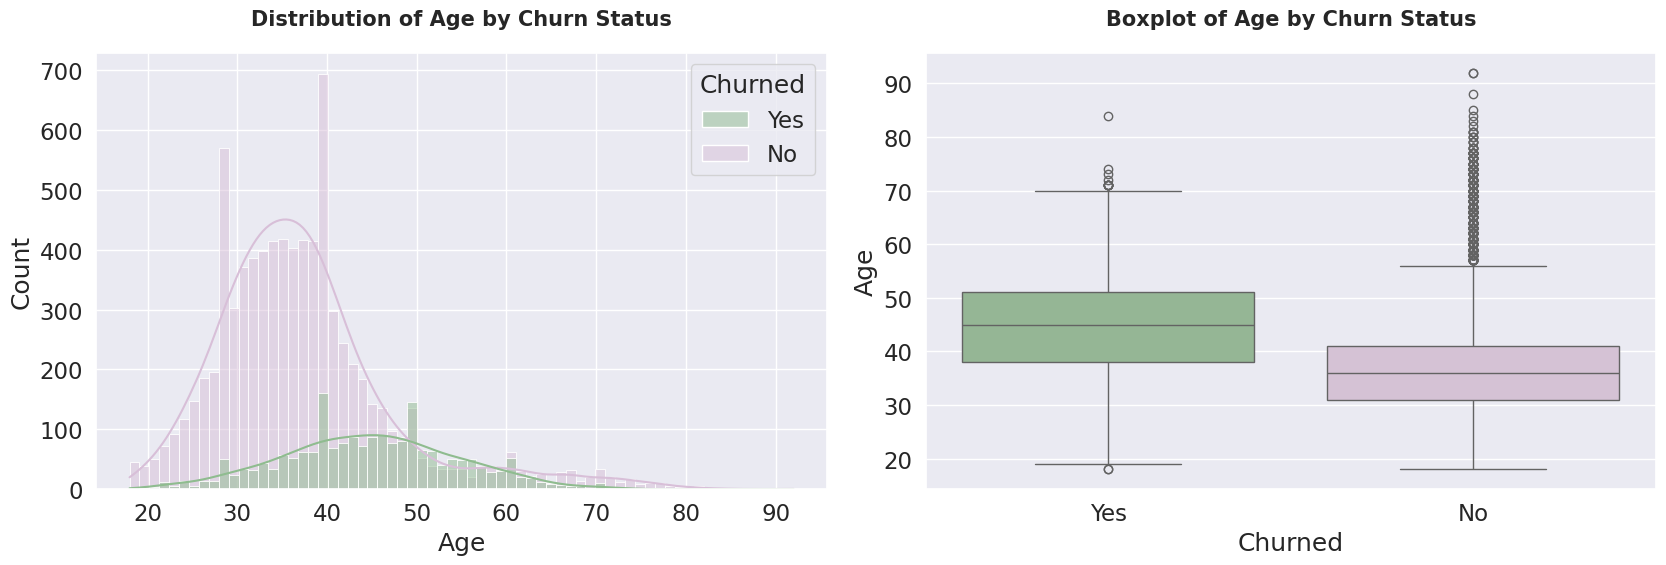

In [ ]:
continousPlot("Age")

In the examination of age distribution among non-churned customers, it is observed to be right-skewed and primarily driven by the existence of outliers as seen in the boxplot visualization on the right. The presence of such outliers poses a risk of overfitting in the model.

In order to overcome the challenges posed by this right-skewed distribution, we can use log normal transformation technique. This technique aims to transform the data distribution into a more normalized form, facilitating a more robust and accurate modeling process.

#### 4.2.1.9 Visualizing Customer Churned by Balance

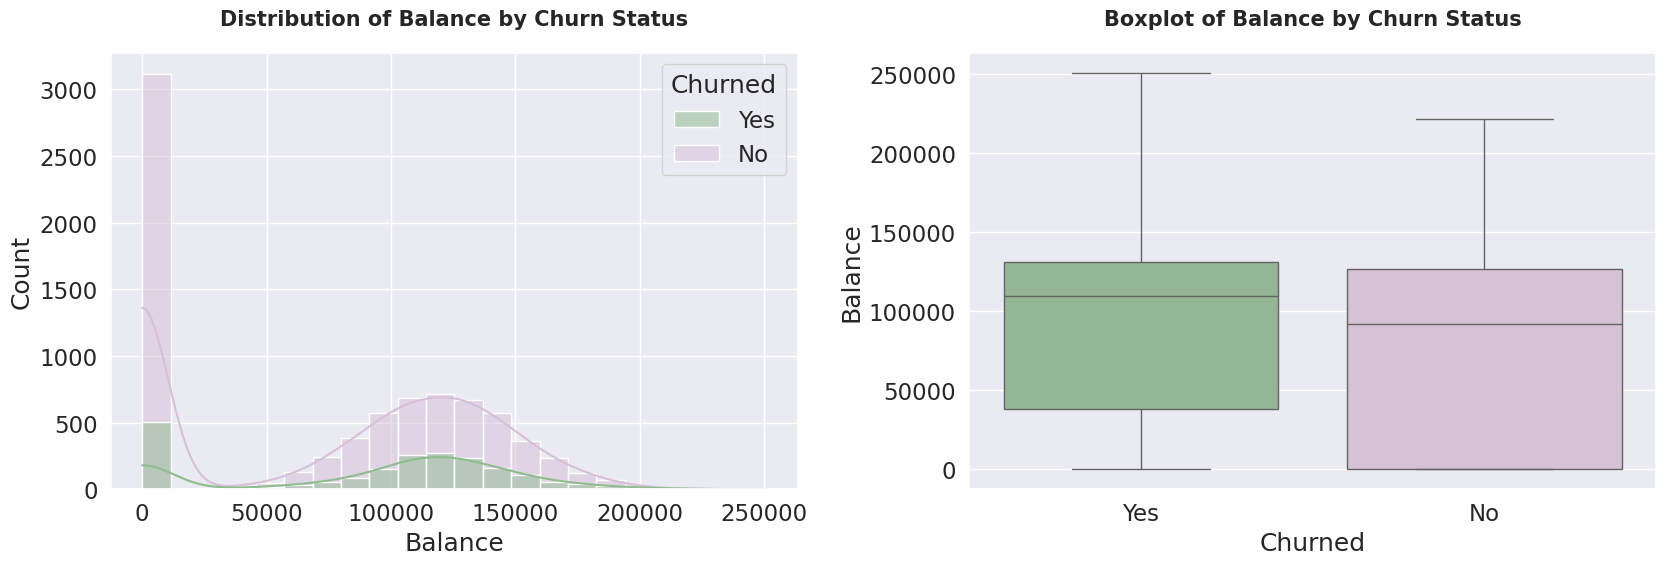

In [ ]:
continousPlot("Balance")

Upon examining the balance distribution categorized by churn status, it becomes evident that over 3000 customers maintain a zero balance in their accounts. Apart from that, the ratio of churned customers among those with zero balance is higher than that of customers with balances exceeding 50,000, indicating a higher likelihood of account deactivation among zero-balance customers.

Furthermore, the presence of customers with zero balance significantly distorts the distribution. However, excluding this group from the analysis reveals a more normalized distribution.

To address this, Feature Engineering offers a viable solution by segregating customers based on their account balances, specifically grouping those with zero balances separately from those with balances greater than zero.

#### 4.2.1.10 Visualizing Customer Churned by Estimated Salary

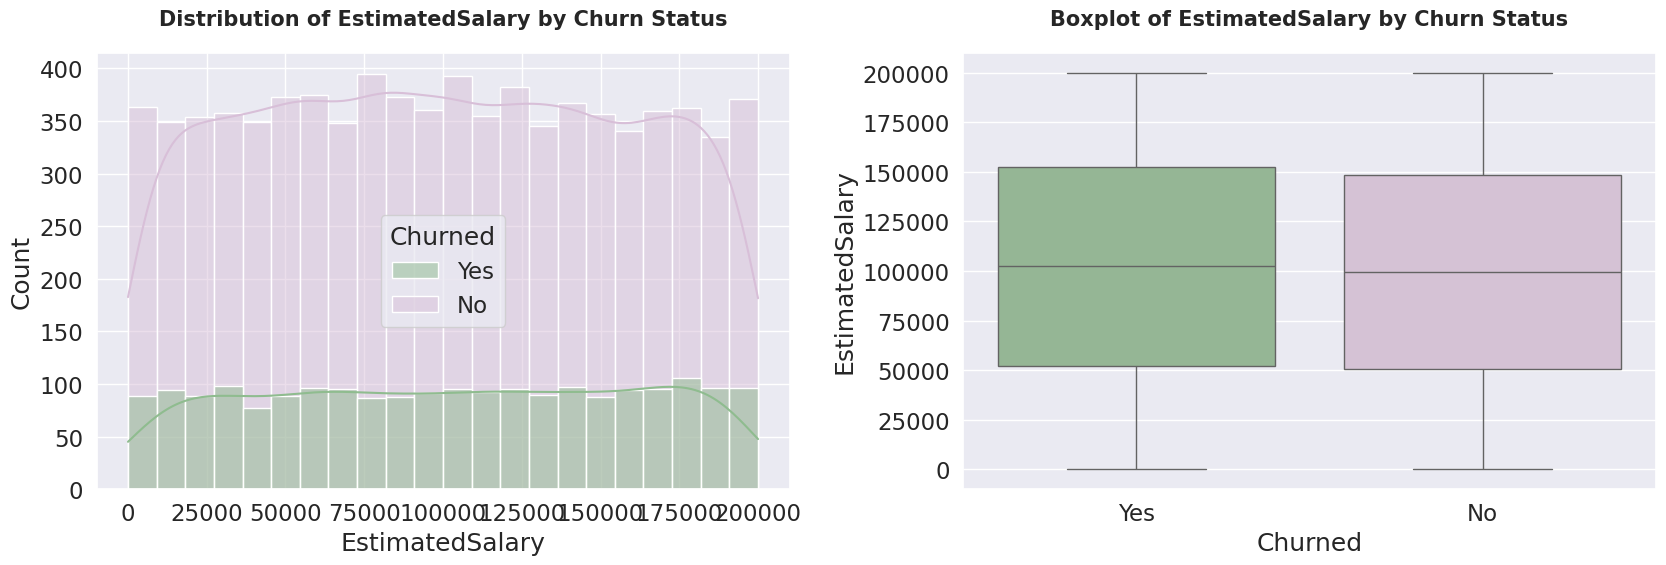

In [ ]:
continousPlot("EstimatedSalary")

The median estimated salary exhibits almost no difference between churned and non-churned customers. This suggests that, on average, customers who churn and those who do not churn have similar estimated salary. Given the similarity in distribution across both churn categories, drawing meaningful conclusions becomes challenging.

### 4.2.2 Feature Engineering

#### 4.2.2.1 Visualizing The New Feature "Total_Products"

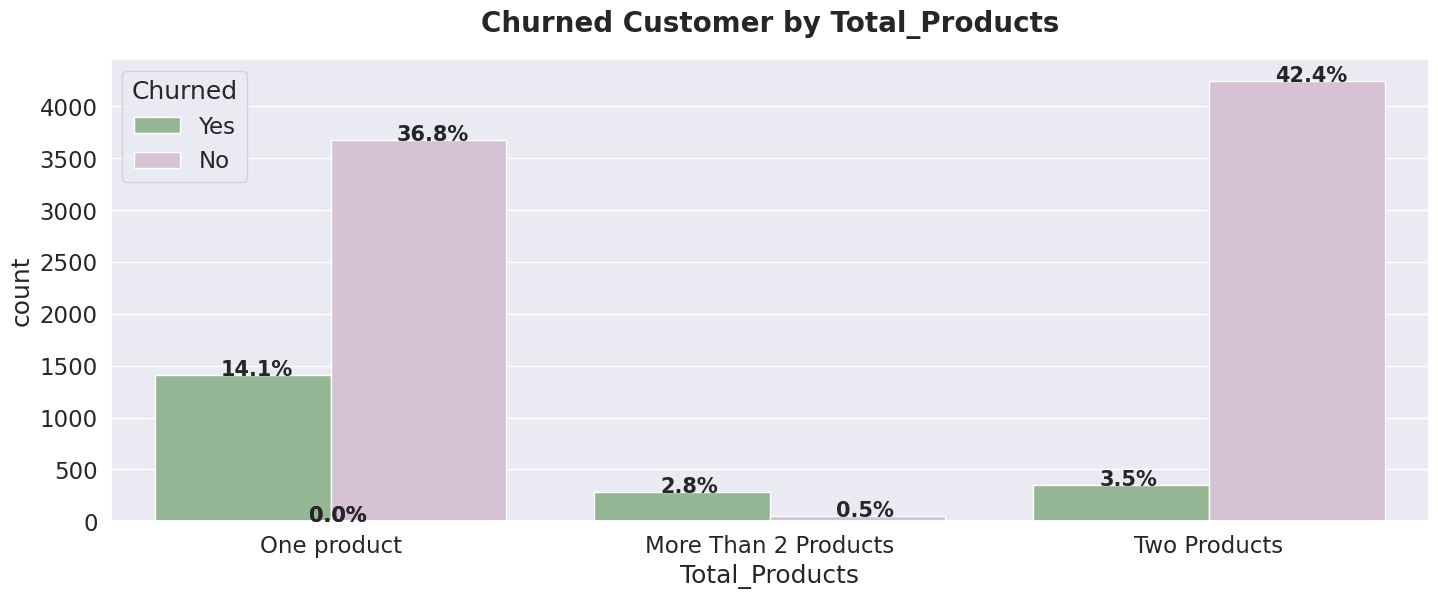

In [ ]:
conditions=[(bankData["NumOfProducts"]==1), (bankData["NumOfProducts"]==2), (bankData["NumOfProducts"]>2)]

values = ["One product","Two Products","More Than 2 Products"]

bankData["Total_Products"] = np.select(conditions,values)

bankData.drop(columns="NumOfProducts", inplace=True)

columnPlot("Total_Products")

#### 4.2.2.2 Visualizing The New Feature "Balance"

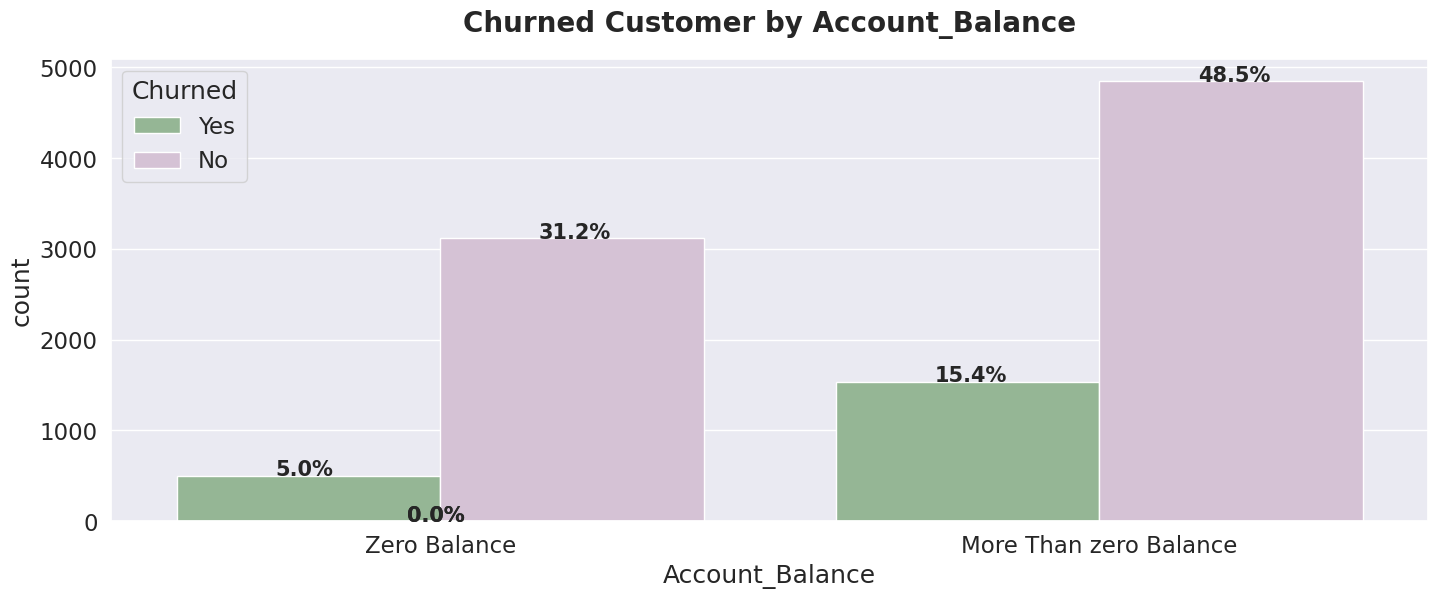

In [ ]:
conditions = [(bankData["Balance"]==0), (bankData["Balance"]>0)]
values = ["Zero Balance","More Than zero Balance"]

bankData["Account_Balance"] = np.select(conditions, values)

bankData.drop(columns="Balance",inplace=True)

columnPlot("Account_Balance")

### 4.2.3 Data Preprocessing

In [ ]:
# Computing unique values of Categorical Columns

catCols = ["Geography","Gender","Total_Products","Account_Balance"]

for column in catCols:
    print(f"Unique Values in {column} column is:",bankData[column].unique())
    print("-"*100,"\n")

Unique Values in Geography column is: ['France' 'Spain' 'Germany']
---------------------------------------------------------------------------------------------------- 

Unique Values in Gender column is: ['Female' 'Male']
---------------------------------------------------------------------------------------------------- 

Unique Values in Total_Products column is: ['One product' 'More Than 2 Products' 'Two Products']
---------------------------------------------------------------------------------------------------- 

Unique Values in Account_Balance column is: ['Zero Balance' 'More Than zero Balance']
---------------------------------------------------------------------------------------------------- 



In [ ]:
# Performing One Hot Encoding on Categorical Features
bankData = pd.get_dummies(columns=catCols, data=bankData)

In [ ]:
# Encoding Target Variable

bankData["Churned"].replace({"No":0,"Yes":1},inplace=True)

bankData.head()

,CustomerId,Surname,CreditScore,Age,Tenure,HasCrCard,IsActiveMember,EstimatedSalary,Churned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Total_Products_More Than 2 Products,Total_Products_One product,Total_Products_Two Products,Account_Balance_More Than zero Balance,Account_Balance_Zero Balance
0,15634602,Hargrave,619,42,2,1,1,101348.88,1,True,False,False,True,False,False,True,False,False,True
1,15647311,Hill,608,41,1,0,1,112542.58,0,False,False,True,True,False,False,True,False,True,False
2,15619304,Onio,502,42,8,1,0,113931.57,1,True,False,False,True,False,True,False,False,True,False
3,15701354,Boni,699,39,1,0,0,93826.63,0,True,False,False,True,False,False,False,True,False,True
4,15737888,Mitchell,850,43,2,1,1,79084.10,0,False,False,True,True,False,False,True,False,True,False


In [ ]:
# Checking Skewness of Continous Features

cols = ["CreditScore","Age","EstimatedSalary"]

bankData[cols].skew().to_frame().rename(columns={0:"Feature Skewness"})

,Feature Skewness
CreditScore,-0.071607
Age,1.011320
EstimatedSalary,0.002085


The age feature exhibits significant right-skewness, indicating the presence of positive outliers. Such skewness can detrimentally affect the effectiveness of certain machine learning algorithms, notably Decision Trees and Linear Models. In order to mitigate the challenges posed by this right-skewed distribution, employing log-normal transformation emerges as a viable strategy to achieve a more normalized distribution.

In [ ]:
# Performing log transformation on age

oldAge = bankData["Age"]
bankData["Age"] = np.log(bankData["Age"])

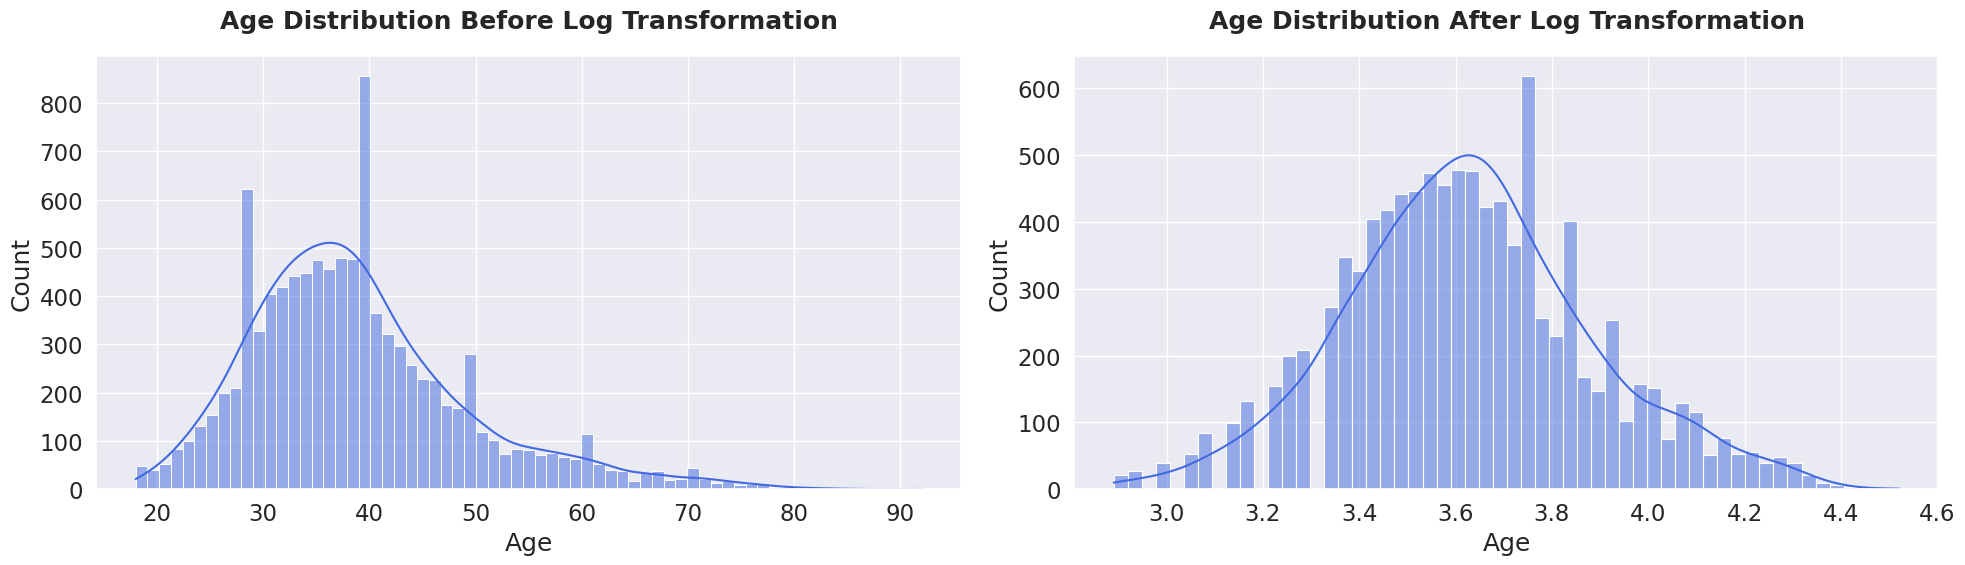

In [ ]:
# Visualizing age on before and after log transformation

plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.histplot(oldAge, color="royalblue", kde=True)
plt.title("Age Distribution Before Log Transformation",fontweight="black",size=18,pad=20)

plt.subplot(1,2,2)
sns.histplot(bankData["Age"], color="royalblue", kde=True)
plt.title("Age Distribution After Log Transformation",fontweight="black",size=18,pad=20)
plt.tight_layout()
plt.show()

Following the application of log-normal transformation, the age distribution now exhibits a normal distribution. This log transformation enhances the model's ability to identify pertinent patterns and facilitates the construction of a more precise accurate model.

In [ ]:
# Segregating features and labels for model training

x = bankData.drop(columns=["Churned"])
y = bankData["Churned"]

In [ ]:
# Splitting data for model training and testing

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

print("Shape of x_train is:",x_train.shape)
print("Shape of x_test is: ",x_test.shape)
print("Shape of y_train is:",y_train.shape)
print("Shape of y_test is: ",y_test.shape)

Shape of x_train is: (8000, 18)
Shape of x_test is:  (2000, 18)
Shape of y_train is: (8000,)
Shape of y_test is:  (2000,)


In [ ]:
# Instantiate the OneHotEncoder
encoder = OneHotEncoder()

# Fit and transform the categorical columns in x_train
x_train_encoded = encoder.fit_transform(x_train)

# Apply SMOTE to the encoded x_train data
x_train_resampled, y_train_resampled = smt.fit_resample(x_train_encoded, y_train)

# Print the shape of the resampled data
print(x_train_resampled.shape, y_train_resampled.shape)

# Print the value counts of the resampled y_train data
y_train_resampled.value_counts().to_frame()

(12736, 19158) (12736,)


,count
Churned,
0,6368
1,6368


According to the table provided, both categories within the churned data now contain an equal number of records. Consequently, we can train the model on balanced records for both churn categories, thereby constructing a predictive model with reduced bias.

# **CHAPTER 5 - CONCLUSION**

In conclusion, our investigation into understanding customer churn behavior in the banking sector has yielded valuable insights and implications for industry stakeholders. Through a comprehensive analysis of patterns, predictors, and retention strategies, we have illuminated critical factors influencing customer churn and proposed actionable interventions to mitigate attrition and foster customer retention.

The key factors that significantly influence the deactivation of customers banking facilities are number of banking products owned, customer's age, customer's member activaion status, customer's gender and customer's geography.

To bolster the findings of this research, additional avenues for exploration could be pursued, particularly through the application of predictive modeling techniques such as Decision Trees and Random Forests. Leveraging these advanced analytical methods can yield deeper insights into customer churn behavior, thereby augmenting our understanding of the underlying drivers and dynamics.

The utilization of predictive modeling not only enables the identification of key predictors and patterns associated with churn but also underscores the transformative potential of machine learning algorithms in refining decision-making processes and shaping strategic initiatives. By harnessing the predictive capabilities of these algorithms, banking institutions can glean actionable intelligence to proactively address customer churn challenges and tailor retention strategies to individual customer needs and preferences.

Moving forward, our research advocates for a proactive approach to customer retention, emphasizing the importance of personalized strategies, service enhancements, and targeted interventions tailored to the unique needs and preferences of customers. By implementing these recommendations, banking institutions can fortify their competitive position, foster long-term customer relationships, and drive sustainable growth in an increasingly dynamic and competitive landscape.

In essence, our study contributes to advancing the understanding of customer churn behavior in the banking sector and provides a roadmap for industry practitioners to navigate and mitigate the challenges posed by attrition. Through collaborative efforts and strategic initiatives, we can collectively strive towards building resilient and customer-centric banking ecosystems that prioritize retention and loyalty in the pursuit of sustained success.